In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.insert(0,'../..')
import omama as O
import pyod.models
import pickle
import sklearn

In [3]:
with open('/raid/mpsych/datasetB.pkl','rb') as f:
    datasetA_X = pickle.load(f)
    
with open('/raid/mpsych/datasetB_labels.pkl', 'rb') as f1:
    labels = np.asarray(pickle.load(f1))

In [4]:
all_images = []
for a in datasetA_X:
    all_images.append(a.pixels)

In [5]:
import mahotas as mh

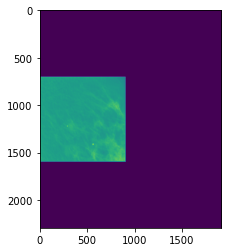

In [6]:
imshow(all_images[0])

In [7]:
SIGMA = 20

In [8]:
filtered = []
histograms = []
for i in all_images:
    f = mh.gaussian_filter(i ,sigma=SIGMA)
    f /= f.max()
    filtered.append(f)
    f *= 255
    histograms.append(mh.fullhistogram(f.astype(np.uint8)))

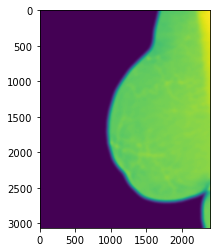

In [9]:
imshow(f)

In [10]:
histograms[0:3]

[array([3444284,   13991,    8679,    6316,    5163,    4351,    3977,
           3323,    2998,    2777,    2644,    2405,    2326,    1862,
           2001,    2024,    1648,    1764,    1804,    1323,    1752,
           1198,    1743,    1079,    1644,     964,    1531,    1032,
           1386,    1077,    1093,    1390,     739,    1287,     974,
           1012,    1149,     782,    1060,    1148,     689,    1073,
           1013,     696,    1034,     958,     637,     999,     942,
            633,     931,     868,     740,     756,     887,     826,
            614,     922,     837,     620,     750,     815,     846,
            533,     808,     741,     764,     618,     794,     708,
            674,     670,     813,     682,     592,     711,     752,
            668,     580,     732,     739,     645,     584,     683,
            768,     633,     545,     678,     802,     603,     511,
            711,     754,     628,     521,     676,     737,     632,
      

In [11]:
raveled = []
for f in filtered:
    raveled.append(f.ravel())
    
FEATURE_VEC = raveled

In [12]:
FEATURE_VEC = histograms

In [13]:
len(FEATURE_VEC)

100

In [14]:
FEATURE_VEC[0].shape

(256,)

In [15]:
od = O.OutlierDetector(0)
models = O.OutlierDetector._init_base_detectors(od.algorithms)

In [ ]:
all_evals = {}

for m in models:
    a_name =  m.__class__.__name__
    print('running', a_name)
    try:
        clf = m
        clf.fit(FEATURE_VEC)

        y_train_scores = clf.decision_scores_
        pred_labels = clf.labels_

        eval = O.OutlierDetectorLite.evaluate(labels, pred_labels)

#         print('*'*10, eval['tp'])
        all_evals[a_name] = eval
    except:
        all_evals[a_name] = -1
        print(a_name, 'failed')
        continue
# y_test_scores = clf.decision_function(X_test)

running AutoEncoder
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               65792     
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 

In [ ]:
all_evals

In [ ]:
best_tp = 0
best_tp_alg = ''
for a in all_evals.keys():
    
    tp = all_evals[a]['tp']
    print(a, tp)
    if best_tp < tp:
        best_tp_alg = a
        best_tp = tp

In [ ]:
best_tp_alg, best_tp

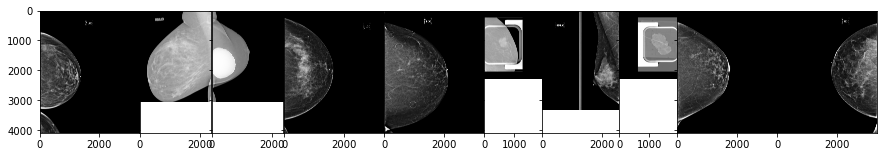

In [167]:
ALGORITHM = 'IForest'



from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['pred_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['pred_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')

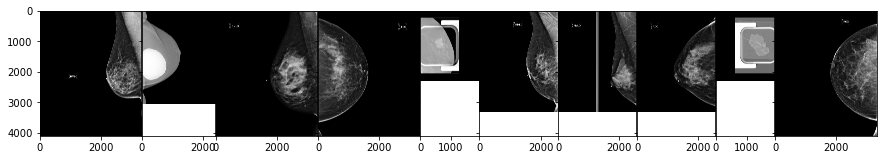

In [177]:
ALGORITHM = 'HBOS'



from mpl_toolkits.axes_grid1 import ImageGrid
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['pred_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['pred_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')

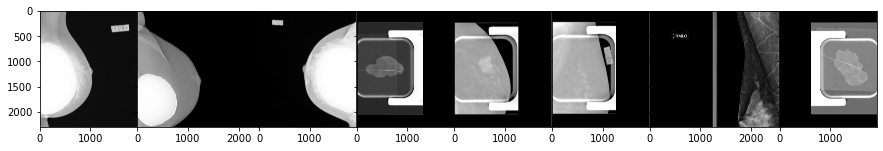

In [168]:
fig = plt.figure(figsize=(15., 60.))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, len(all_evals[ALGORITHM]['groundtruth_indices'][0])),  
                 axes_pad=0.01,  
                 )
for i,ax in enumerate(grid):

    indexxx = all_evals[ALGORITHM]['groundtruth_indices'][0][i]
    ax.imshow(all_images[indexxx], cmap='gray')